In [101]:
import os
import numpy as np

In [102]:
np.random.seed(42)

In [103]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
sn.set()
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [104]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [105]:
display(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [106]:
display(housing.describe())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [107]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

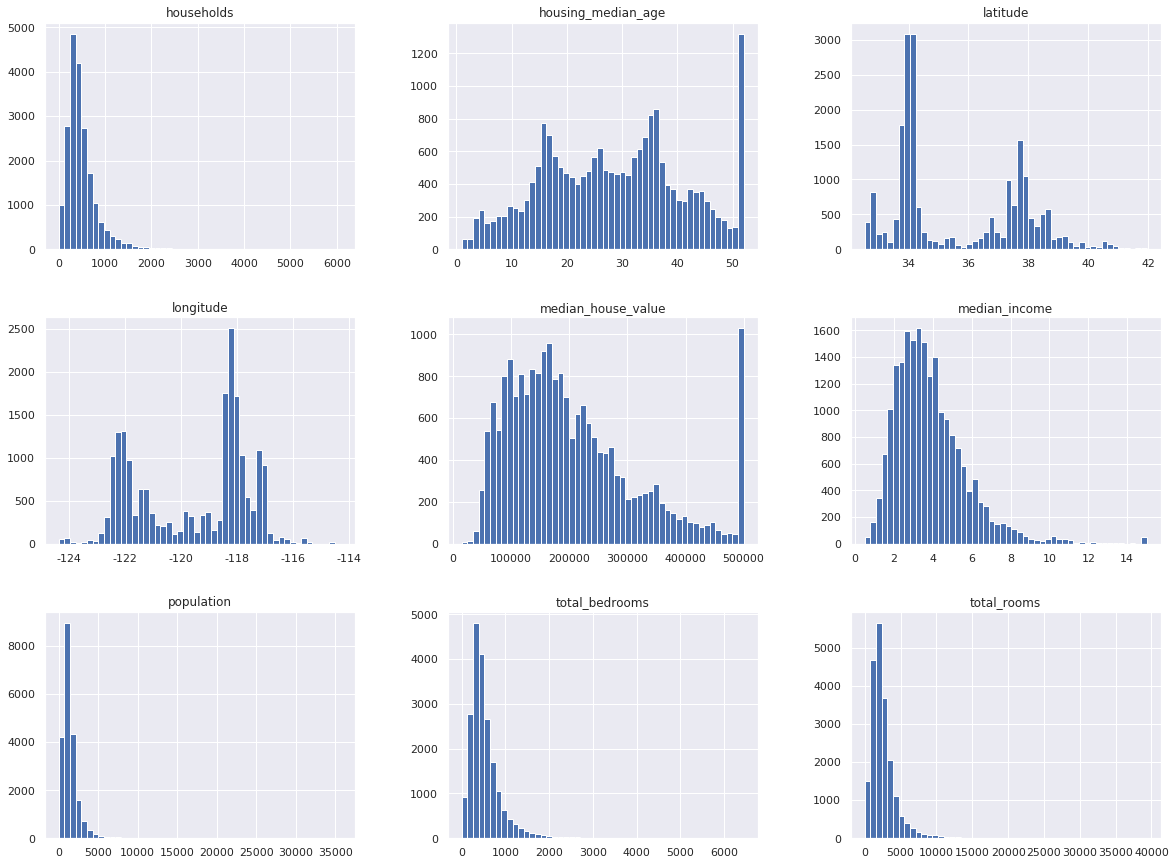

In [108]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [110]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
# 인컴을 좀더 계층적으로 나누기 위해, 그리고 일단 6만불 이상은 날렸음

In [111]:
housing['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

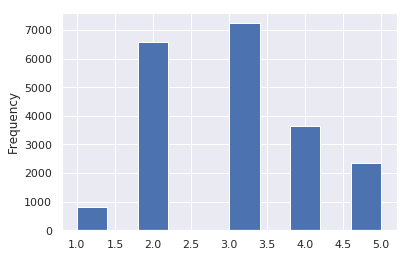

In [112]:
housing['income_cat'].plot(kind='hist')

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit

# income_cat 기준으로 split하기
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [114]:
# print(strat_train_set.head())
# print(train_set.head())

In [115]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [116]:
strat_train_set['income_cat'].value_counts() / len(housing)

3.0    0.280475
2.0    0.255087
4.0    0.141037
5.0    0.091521
1.0    0.031880
Name: income_cat, dtype: float64

In [96]:
train_set['income_cat'].value_counts() / len(housing)

3.0    0.278876
2.0    0.253973
4.0    0.142829
5.0    0.092539
1.0    0.031783
Name: income_cat, dtype: float64

In [117]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    # 삭제

In [118]:
housing = strat_train_set.copy()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

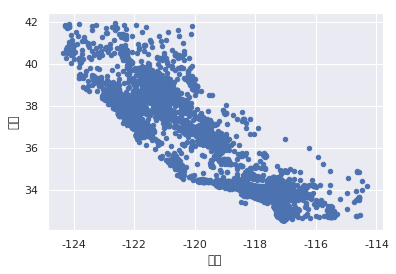

In [119]:
ax = housing.plot(kind='scatter',x='longitude', y='latitude')
ax.set(xlabel='경도',ylabel='위도')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[Text(0, 0.5, '위도'), Text(0.5, 0, '경도')]

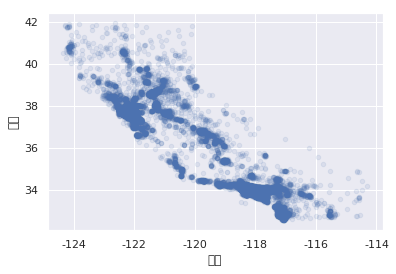

In [120]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')

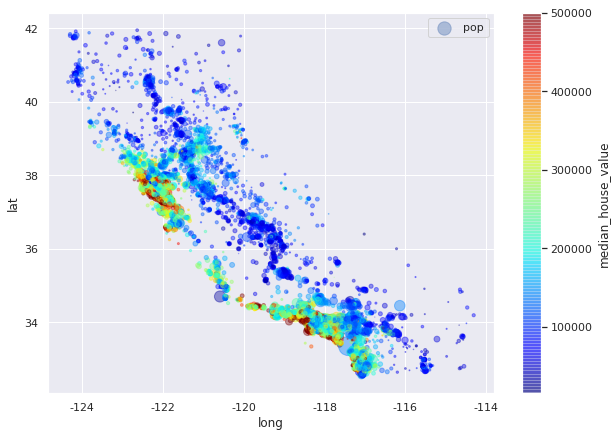

In [123]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="pop", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='long', ylabel='lat')
plt.legend()

In [124]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [125]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [126]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [127]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [128]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


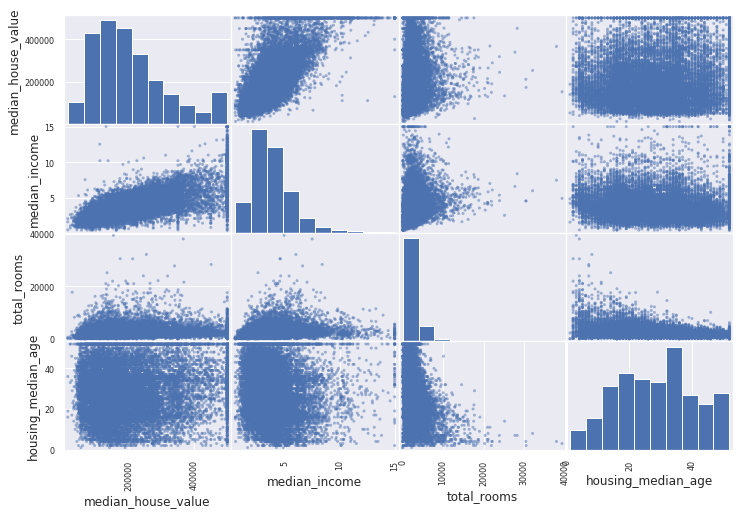

In [129]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


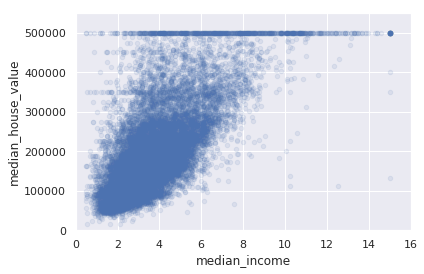

In [130]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000]);

In [132]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [133]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [134]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [135]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [136]:
# total_bedrooms 보충해야함
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

In [137]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [138]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [139]:
sample_incomplete_rows.drop('total_bedrooms',axis=1) # 아예 컬럼 날리기 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [140]:
# 방법3: 어떤 값으로 채우기(median) -> fillna()
median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [141]:
from sklearn.preprocessing import Imputer

housing_num = housing.drop('ocean_proximity',axis=1)

imputer = Imputer(strategy='median')
imputer.fit(housing_num)

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [142]:
print('imputer.statistics_ :', imputer.statistics_)
print('housing_num.median().values :', housing_num.median().values)

imputer.statistics_ : [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
housing_num.median().values : [-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [144]:
X = imputer.transform(housing_num)

# NumPy의 array이므로 다시 pandas.DataFrame으로 변환해준다.
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index.values)

# Null값이 median 값으로 잘 채워졌는지 확인
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [146]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [57]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [58]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0], dtype=int64)

In [59]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [61]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
housing_cat_1hot = ohe.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [147]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [148]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [64]:
# factorize로 숫자로 바꾼 다음 그거를 reshape해서
# 바로 ohe.fit_transform에 던져주니 되는걸?

In [65]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print("max of data = ", scaler.data_max_)
print("min of data = ", scaler.data_min_)
print("data range = ", scaler.data_range_)
print("<data scaling> \n", scaler.transform(data))
print('[2, 2] minmax scaling =', scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(0, 1))
max of data =  [ 1. 18.]
min of data =  [-1.  2.]
data range =  [ 2. 16.]
<data scaling> 
 [[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[2, 2] minmax scaling = [[1.5 0. ]]


In [149]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print('mean = ', scaler.mean_)
print('variance = ', scaler.var_)
print('z-score = \n', scaler.transform(data))
print('[2, 2] transformation result = ', scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
mean =  [0.5 0.5]
variance =  [0.25 0.25]
z-score = 
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[2, 2] transformation result =  [[3. 3.]]


In [151]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [153]:
# 변환 파이프라인을 한번 만들어보자
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [155]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [159]:
housing_num_tr.shape

(16512, 11)

In [161]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes_names].values

In [163]:
# 결국은 아까 특성을 num들이랑 cat들이랑 나눴었다!
num_attribs = housing_num.columns.tolist()
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [164]:
cat_attribs = ['ocean_proximity']

In [167]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [209]:
# 연습
pip = Pipeline([
    ('x', justDataFrameSelectorToSeries(cat_attribs))
])

In [210]:
pip.fit_transform(housing).head()

0     <1H OCEAN
1     <1H OCEAN
2    NEAR OCEAN
3        INLAND
4     <1H OCEAN
Name: value, dtype: object

In [224]:
from sklearn.base import BaseEstimator, TransformerMixin

class justDataFrameSelectorToSeries(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attributes_names].melt()['value']
    
class Factorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.factorize()[0].reshape(-1,1)
    
class ToArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.toarray()

cat_pipeline = Pipeline([
    ('selector', justDataFrameSelectorToSeries(cat_attribs)),
    ('factorizer', Factorizer()),
    ('onehotencoder', OneHotEncoder()),
    ('toarray', ToArray())
])

cat_attribs = ['ocean_proximity']

In [225]:
cat_pipeline.fit_transform(housing)
# 파이프라인 통과시킨후 toarray()쓰면됨

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [226]:
# 그리고 두 파이프라인 합치기!
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [227]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [229]:
housing_prepared.shape

(16512, 16)

In [230]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [231]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [232]:
print("expectation : ", lin_reg.predict(some_data_prepared))
print("labels : ", list(some_labels))

expectation :  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels :  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [233]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mes = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mes)
print("RMSE: ", lin_rmse)

RMSE:  68628.19819848922


In [234]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [235]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [236]:
np.sqrt(tree_mse)

0.0

In [238]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

# DecisionTree
display_scores(tree_rmse_scores)

점수: [68823.47756543 67862.93703166 71512.54118076 68980.73369949
 71836.42457261 75733.4824768  71395.82271018 71475.96822174
 76114.81992143 70527.98855344]
평균: 71426.41959335518
표준편차: 2587.9156392379173


In [247]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준편차: 2731.674001798349


In [249]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

점수: [69243.10219869 67430.67915426 70357.7483244  69394.82638795
 71479.87106493 74847.4744087  70192.97248292 71627.57862914
 75859.08909115 70533.66416241]
평균: 71096.70059045496
표준편차: 2421.3426131916567


In [241]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=2018)
kfold

KFold(n_splits=10, random_state=2018, shuffle=True)

In [243]:
score = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=kfold)

In [244]:
score

array([0.65806932, 0.68559367, 0.66091644, 0.64321095, 0.55843921,
       0.62915581, 0.65851998, 0.62619388, 0.63962841, 0.66700328])

In [245]:
score = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=kfold)

In [246]:
score

array([0.58499088, 0.6743635 , 0.60915303, 0.62319376, 0.69167034,
       0.60243036, 0.63374868, 0.57808346, 0.60163377, 0.62102601])

In [250]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

C:\Users\KTH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [251]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print('RMSE :', forest_rmse)

RMSE : 22137.523861008565


In [252]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51410.52555694 49408.08775711 53596.25669043 54820.9795026
 50903.87982382 56281.96153024 51936.85494851 49904.99068523
 55337.76136373 53587.06536149]
평균: 52718.83632200981
표준편차: 2235.9191865475136


In [254]:
score = cross_val_score(forest_reg, housing_prepared, housing_labels, cv=kfold)
score

array([0.78353996, 0.8122925 , 0.77596622, 0.79490516, 0.804855  ,
       0.78962956, 0.8092761 , 0.76793214, 0.79338722, 0.79385876])

In [255]:
# 그리드 탐색을 통한 모델 세부 튜님
from sklearn.model_selection import GridSearchCV

# 그럼 요 param_grid는 모델마다 달라지는 거신가?
param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합
    # n_estimators는 생성할 트리 개수
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

# GridSearchCV의 두번째 파라미터로 param_grid를 넘겨줌
forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [256]:
# 쉽게 말하면 그리드서치는 "좀 다양하게 다 시도해보겠다?" 이런 느낌
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [257]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [258]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([0.11688471, 0.35544701, 1.06515064, 0.17852058, 0.56628413,
        1.68888125, 0.2483336 , 0.78110933, 2.18116617, 0.29500947,
        0.91874108, 2.77278466, 0.16495628, 0.52698851, 0.21203218,
        0.69274588, 0.2680819 , 0.77433529]),
 'std_fit_time': array([0.01401254, 0.02556354, 0.01813933, 0.00975024, 0.02260636,
        0.08174472, 0.02041089, 0.03351703, 0.03865052, 0.01600042,
        0.0152095 , 0.04208244, 0.0122581 , 0.00613533, 0.0116932 ,
        0.01093424, 0.01231695, 0.10139984]),
 'mean_score_time': array([0.00538774, 0.01456141, 0.04109068, 0.00478864, 0.01356492,
        0.03630438, 0.00438933, 0.01635795, 0.03829894, 0.00398993,
        0.0123682 , 0.03730235, 0.00518713, 0.02094569, 0.00538697,
        0.01436176, 0.00478702, 0.01296616]),
 'std_score_time': array([1.01742139e-03, 2.05328483e-03, 9.63704581e-03, 3.98755341e-04,
        1.35316891e-03, 1.62093386e-03, 4.88480778e-04, 7.81886038e-03,
        5.97112782e-03, 1.03375833e-

In [264]:
cvres["mean_test_score"]

array([-4.22506752e+09, -3.19773699e+09, -2.87291889e+09, -3.59124275e+09,
       -2.78164847e+09, -2.55342056e+09, -3.43442678e+09, -2.71470940e+09,
       -2.50761157e+09, -3.40060167e+09, -2.68155881e+09, -2.48982075e+09,
       -3.99376883e+09, -2.98110673e+09, -3.60514608e+09, -2.75241588e+09,
       -3.26697149e+09, -2.64873055e+09])

In [263]:
cvres["params"]

[{'max_features': 2, 'n_estimators': 3},
 {'max_features': 2, 'n_estimators': 10},
 {'max_features': 2, 'n_estimators': 30},
 {'max_features': 4, 'n_estimators': 3},
 {'max_features': 4, 'n_estimators': 10},
 {'max_features': 4, 'n_estimators': 30},
 {'max_features': 6, 'n_estimators': 3},
 {'max_features': 6, 'n_estimators': 10},
 {'max_features': 6, 'n_estimators': 30},
 {'max_features': 8, 'n_estimators': 3},
 {'max_features': 8, 'n_estimators': 10},
 {'max_features': 8, 'n_estimators': 30},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3},
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}]

In [265]:
zip(cvres["mean_test_score"], cvres["params"]) # 1번은 1번, 2번은 2번끼리... 묶어주는 것

In [266]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65000.5193942094 {'max_features': 2, 'n_estimators': 3}
56548.53660102931 {'max_features': 2, 'n_estimators': 10}
53599.61651020238 {'max_features': 2, 'n_estimators': 30}
59926.97847812113 {'max_features': 4, 'n_estimators': 3}
52741.33546054288 {'max_features': 4, 'n_estimators': 10}
50531.38192968362 {'max_features': 4, 'n_estimators': 30}
58603.98266954631 {'max_features': 6, 'n_estimators': 3}
52102.87323780172 {'max_features': 6, 'n_estimators': 10}
50076.05783211156 {'max_features': 6, 'n_estimators': 30}
58314.67803080203 {'max_features': 8, 'n_estimators': 3}
51783.76979273464 {'max_features': 8, 'n_estimators': 10}
49898.10362638141 {'max_features': 8, 'n_estimators': 30}
63196.27231728963 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54599.512222547426 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60042.86867052073 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52463.47189552421 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [267]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116885,0.014013,0.005388,0.001017,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.142855e+09,-4.228249e+09,...,-4.225068e+09,1.127116e+08,18,-1.102243e+09,-1.066417e+09,-1.128840e+09,-1.189207e+09,-1.184946e+09,-1.134331e+09,4.742426e+07
1,0.355447,0.025564,0.014561,0.002053,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.025928e+09,-3.209143e+09,...,-3.197737e+09,1.643116e+08,11,-5.900618e+08,-5.554315e+08,-5.702883e+08,-6.044971e+08,-5.905535e+08,-5.821665e+08,1.724635e+07
2,1.065151,0.018139,0.041091,0.009637,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.705161e+09,-2.975864e+09,...,-2.872919e+09,1.653021e+08,9,-4.495211e+08,-4.234976e+08,-4.364888e+08,-4.431425e+08,-4.341274e+08,-4.373555e+08,8.771601e+06
3,0.178521,0.009750,0.004789,0.000399,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.478278e+09,-3.650069e+09,...,-3.591243e+09,1.251666e+08,15,-9.522921e+08,-9.229737e+08,-9.076761e+08,-9.314693e+08,-9.836141e+08,-9.396051e+08,2.630591e+07
4,0.566284,0.022606,0.013565,0.001353,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.600820e+09,-2.855997e+09,...,-2.781648e+09,1.218064e+08,8,-5.009700e+08,-5.061179e+08,-4.942545e+08,-5.124880e+08,-5.207576e+08,-5.069176e+08,9.153623e+06


In [272]:
pd.DataFrame(grid_search.cv_results_).sort_values('mean_test_score', ascending=False).head(1) # 제일 성능 좋은 놈

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,2.772785,0.042082,0.037302,0.004745,8,30,NaN,"{'max_features': 8, 'n_estimators': 30}",-2.299527e+09,-2.527247e+09,...,-2.489821e+09,1.507860e+08,1,-3.781713e+08,-3.768615e+08,-3.749707e+08,-3.868582e+08,-3.760918e+08,-3.785907e+08,4.263009e+06


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)